In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
plt.style.use('seaborn-dark')

## Logistic Regression 

In [30]:
class LogisticRegression:
    
    def __init__(self):
        self.alpha = 0.01               # learning_rate Alpha
        self.theta = None               # List of Parameters = {θ1, θ2, θ3 .... θn}
        self.theta0 = None              # θ0
        self.epochs = 10000             # iterations
        self.cost_history = []          # contains details of cost for each iteration
        
    def fit(self, x, y):
        ''' 
        fits data into the classifier.
        Then apply Gradient descent to update the minimize the cost and update the parameters
        '''
        
        n_features = len(x[0])          # number of features.
        theta = np.zeros(n_features)    # populating the parameters with 0 and shape equal to that of number of features.
        theta0 = 0
        
        # GRADIENT DESCENT
        for i in range(self.epochs):
            thetaX = np.dot(x, theta) + theta0      # z = θ.X +  θ0
            h_thetaX = self.sigmoid(thetaX)         # h(θ.X) = sigmoid(z) or 1 / 1 + e^-z
            
            self.cost_history.append(self.cost(h_thetaX, y))      # populating the cost_history list
            
            d_theta = (1/len(x))*np.dot(x.T ,(h_thetaX - y))      # Calculating [ d(J(θ))/dθ ]
            d_theta0 = (1/len(x))*np.sum(h_thetaX - y)             
            
            # UPDATING PARAMETERS 
            theta = theta - self.alpha * d_theta
            theta0 = theta0 - self.alpha * d_theta0
        
        # saving parameters in class variables.
        self.theta = theta  
        self.theta0 = theta0
        return
        
    def predict(self, x):
        h_thetaX = self.sigmoid(np.dot(x, self.theta) + self.theta0)   # sigmoid (x.θ + θ0)
        return np.round(h_thetaX)                                      # 0 if <.5, 1 if >=.5
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h_thetaX, y):
        log = np.log
        cost = -1/(len(y))*(np.dot(y,log(h_thetaX)) + np.dot((1-y), log(1-h_thetaX)))
        return cost
    
    def score(self, x, y):
        # Outputs accuracy.
        h_thetaX = self.sigmoid(np.dot(x, self.theta) + self.theta0)
        preds = np.round(h_thetaX)
        preds = preds.astype('int')
        true_preds = [1 if preds[i] == y[i] else 0 for i in range(len(preds))]
        score = np.sum(true_preds)/len(true_preds)
        return score

### Fitting Data into the classifier and checking the performance.

Accuracy :  0.835


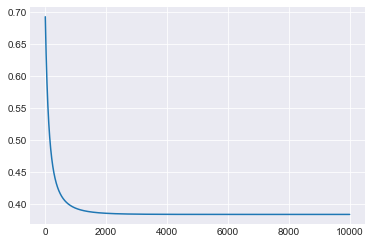

In [31]:
# Testing on another randomly generated dataset for classification.

data_x, data_y  = make_classification(n_samples = 1000, n_features = 14, n_redundant = 0, n_repeated = 0,n_classes = 2)
xtrain, xtest, ytrain, ytest = train_test_split(data_x, data_y, test_size = 0.2)

clf1 = LogisticRegression()
clf1.fit(xtrain,ytrain)

print("Accuracy : ",clf1.score(xtest,ytest))
plt.plot(clf1.cost_history)
plt.grid()
plt.show()

### Using the classifier on the Wisconsin Breast Cancer dataset.

Accuracy = 0.95


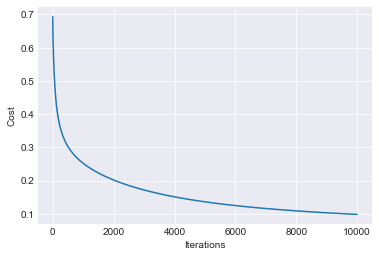

In [32]:
df = pd.read_csv('breast-cancer-wisconsin.txt', header = None)

column_names = ['id',
                 'clump_thickness',
                 'cell_size_uniformity',
                 'cell_shape_uniformity',
                 'marginal_adhesion',
                 'single_epithelial_cell_size',
                 'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

df.columns = column_names

df['class'].replace({2,4}, {0,1}, inplace = True)         

# Dropping rows that contains missing feature.
df.drop(df.iloc[:,6][df.iloc[:,6] == '?'].index.values, inplace = True, axis = 0)
df = df.astype('int32')

X = np.array(df.drop(['class','id'], axis = 1))
Y = np.array(df['class']);

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

clf = LogisticRegression()
clf.fit(X_train,y_train)
print("Accuracy = {:.2f}".format(clf.score(X_test, y_test)))

plt.plot(clf.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()